## Megaline Plataforma

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra. <br>
<br>
Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos. <br>
Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto.<br>
<br>
Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

## Diccionario de Datos

Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

- сalls: número de llamadas,
- minutes: duración total de la llamada en minutos,
- messages: número de mensajes de texto,
- mb_used: Tráfico de Internet utilizado en MB,
- is_ultra: plan para el mes actual (Ultra - 1, Smart - 0).

# 1. Inicializacion

In [1]:
# Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar librerias de Clasificacion
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1.1 Cargar Datos

In [2]:
# Carga de archivos de datos
df = pd.read_csv('C:\\Users\\gudia\\Documents\\Doc TripleTen\\Proyectos Sprint\\Sprint_9\\Proyecto\\users_behavior.csv')
df.info()
print()
print(df.sample(3)) # Revisando alreatoriamente los datos
print()
print(df.isnull().sum()) # Revisar si existen datos nulos por columna
print()
print(f"El numero de (filas, columnas) del dataset es: ", df.shape)
print(f"El numero de filas duplicadas es:", df.duplicated().sum()) # Revisando filas duplicadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

      calls  minutes  messages   mb_used  is_ultra
2370  111.0   814.29     112.0  21169.96         1
1222   94.0   588.73      27.0  32679.81         1
809    60.0   447.87      33.0  13114.53         0

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

El numero de (filas, columnas) del dataset es:  (3214, 5)
El numero de filas duplicadas es: 0


Comentarios: <br>
Primeramente, me asegure de que los datos que existen en el dataframe tengan esa integridad. <br>
Se observa que no existen datos nulos, y tampoco existen filas duplicadas. <br>
En este caso, se observa que los datos se muestran limpios, para proceder con el analisis. Tal como se menciona en las instrucciones. 

# 2. Dataset

### 2.1 Segmentacion del Dataset

In [3]:
# Segmentar los datos del Dataset
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

### 2.2 Division del Dataset

In [4]:
# Uso de train_test para la division de los datos del dataset.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# 3. Modelos

Para la eleccion de los modelos a entrenar, dados los datos en el dataset y su interpretacion. El tipo de datos es de clasificacion (ya que son numeros discretos). <br>
En este punto ya se importaron las librerias y prepararon las caracteristicas (features) y objetivo (target) <br>
Se procede a la division de datos para comprobar el modelo (75% Entrenamiento / 25% Prueba), y despues la creacion de modelo.

### 3.1 DecisionTreeClassifier

In [5]:
# Creacion y entrenamiento del modelo
max_depth_dtc = 0
most_accurate_dtc = 0
depths = list(range(1,11))
accuracies = []

for depth in range(1, 11):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dtc.fit(features_train, target_train)
    predictions = model_dtc.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    accuracies.append(accuracy)
    print(f"max_depth={depth}: accuracy={accuracy:.8f}")
    if accuracy > most_accurate_dtc:
        max_depth_dtc = depth
        most_accurate_dtc = accuracy

print()
print(f"la mejor exactitud del modelo en el conjunto de validacion (max_depth = {max_depth_dtc}): {most_accurate_dtc:.8f}")

max_depth=1: accuracy=0.75000000
max_depth=2: accuracy=0.78358209
max_depth=3: accuracy=0.78855721
max_depth=4: accuracy=0.78109453
max_depth=5: accuracy=0.78109453
max_depth=6: accuracy=0.76616915
max_depth=7: accuracy=0.78980100
max_depth=8: accuracy=0.78855721
max_depth=9: accuracy=0.78855721
max_depth=10: accuracy=0.78731343

la mejor exactitud del modelo en el conjunto de validacion (max_depth = 7): 0.78980100


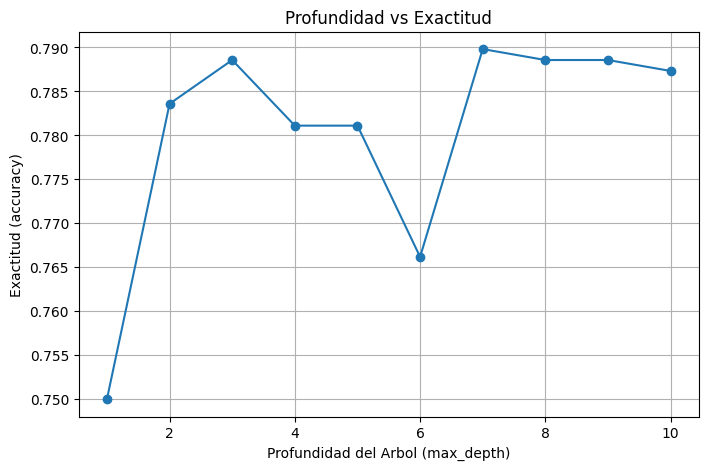

In [6]:
# graficar exactitud vs profundidad (en busca de sobreajuste)
plt.figure(figsize= (8,5))
plt.plot(depths, accuracies, marker='o')
plt.title("Profundidad vs Exactitud")
plt.xlabel("Profundidad del Arbol (max_depth)")
plt.ylabel("Exactitud (accuracy)")
plt.grid(True)
plt.show()

El modelo con la mejor profundidad muestra ser de 7, con una exactitud de aproximadamente 79%, sin embargo, la grafica muestra un alza en la exactitud hasta la profundidad 3. El maximo punto supone que el modelo pudiera estar sobreajustado. Por lo tanto, en este modelo la profundidad optima, sin intentar llegar al sobreajuste sera 3.<br>
<br>
Este modelo muestra cierta confiabilidad, para comenzar con conclusiones y analisis respecto al comportamiento de los usarios, tomando como referencia sus caracteristicas de consumo. Sin embargo, se buscara mayor exactitud utilizando un nuevo modelo (LogisticRegression).

### 3.2 LogisticRegression

In [7]:
# Creacion y entrenamiento del modelo
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
score_train = model_lr.score(features_train, target_train)
score_test = model_lr.score(features_test, target_test)

print("Accuracy del modelo de regresion logistica en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresion logistica en el conjunto de testeo:", score_test)

Accuracy del modelo de regresion logistica en el conjunto de entrenamiento: 0.74149377593361
Accuracy del modelo de regresion logistica en el conjunto de testeo: 0.753731343283582


Para este punto, tengo 2 modelos testeados: <br>
- DecisionTreeClassifier ~ 79%
- LogisticRegression ~ 75% <br>

Mostrando cierta solidez en exactitud ambos modelos. Continuare con RandomForestClassifier para terminar con la comparacion, para determinar la conclusion en la relacion del comportamiento de los usuarios respecto a su uso de datos y el plan heredado.

### 3.3 RandomForestClassifier

In [8]:
# Creacion y entrenamiento del modelo
best_model_rf = None
best_result_rf = 0
best_est_rf = 0

for est in range(10, 51, 10):
    model_rf = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_rf.fit(features_train, target_train)
    result_rf = model_rf.score(features_test, target_test)

    if result_rf > best_result_rf:
        best_model_rf = model_rf
        best_result_rf = result_rf
        best_est_rf = est

    print(f"n_estimators:{est}, y exactitud={result_rf:.6f}")
print()
print(f"El mejor modelo tiene n_estimators={best_est_rf} y exactitud:{best_result_rf:.6f}")

n_estimators:10, y exactitud=0.789801
n_estimators:20, y exactitud=0.788557
n_estimators:30, y exactitud=0.792289
n_estimators:40, y exactitud=0.792289
n_estimators:50, y exactitud=0.797264

El mejor modelo tiene n_estimators=50 y exactitud:0.797264


### 3.4 Prueba de Cordura

In [9]:
# Importar libreria
from sklearn.dummy import DummyClassifier

# Entrenamiento del mejor modelo. 
best_model = RandomForestClassifier(random_state=12345, n_estimators=50)
best_model.fit(features_train, target_train)
best_result = best_model.score(features_test, target_test)

# Evaluación final
final_accuracy = best_model.score(features_test, target_test)

# Aplicando la prueba de Cordura
dummy_model = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_model.fit(features_train, target_train)
dummy_accuracy = dummy_model.score(features_test, target_test)

# Impresion de los resultados
print(f"Modelo final: {final_accuracy:.6f}")
print(f"Modelo 'dummy': {dummy_accuracy:.6f}")

Modelo final: 0.797264
Modelo 'dummy': 0.700249


El modelo muestra su eficacia, al haber quedado su exactitud por encima del modelo dummy, suponiendo que el modelo seleccionado realmente esta aprendiendo a trabajar con las caracteristicas del dataset. <br>
- Modelo RandomForest: 79.7% de exactitud
- Modelo dummy: 70.0% de exactitud
- Diferencia: ~9.7 puntos porcentuales

# 4. Conclusion

Para abordar el objetivo de la telefonia Megaline, de poder recomendar los planes "Smart" y "Ultra" a los usuarios con los planes heredados, se entrenaron y evaluaron tres de los modelos de clasificacion, utilizando los datos de comportamiento de los usuarios. <br>
Basado en los resultados de los 3 modelos: 

- Bosque Aleatorio: Resulto ser el modelo con mayor exactitud con 0.797264.
- Arbol de Decision: Tuvo un buen desempeño, mostrando un alza hasta la profundidad de 3, llegando a la exactitud de 0.78855721 en validacion.
- Regresion Logistica: fue el modelo con menor exactitud, obteniendo una exactitud de 0.75373 <br>

Los 3 modelos superaros el umbral de exactitud requerido. Sin embargo, el Bosque Aleatorio se destaca como la mejor opcion que puede tomar la empresa telefonica para poder predecir correctamente el mejor plan para los usuarios, proporcionando mayor precision y capacidad de prediccion. 